<a href="https://colab.research.google.com/github/Skyquinn/StroopAndMoodAnalysis/blob/main/skyfinalcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("tidyverse", repos="https://cloud.r-project.org")
library(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
summary_df <- read_csv("all_summary_final.csv")
trials_df  <- read_csv("all_trials_final.csv")

Rows: 18 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (4): participant_nr, age, happy_rating, angry_rating

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 360 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): smiley, word, congruence, resp
dbl (4): onset, rt, correct, participant_nr

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
glimpse(summary_df)
glimpse(trials_df)


Rows: 18
Columns: 4
$ participant_nr <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ age            <dbl> 22, 24, 24, 25, 23, 25, 25, 22, 23, 23, 23, 25, 24, 23,…
$ happy_rating   <dbl> 4, 4, 4, 5, 1, 4, 2, 5, 4, 1, 1, 3, 3, 2, 4, 4, 3, 4
$ angry_rating   <dbl> 2, 2, 4, 1, 3, 5, 3, 5, 1, 2, 4, 1, 4, 2, 2, 1, 2, 5
Rows: 360
Columns: 8
$ smiley         <chr> "happy", "angry", "happy", "happy", "happy", "angry", "…
$ word           <chr> "angry", "angry", "happy", "angry", "happy", "happy", "…
$ congruence     <chr> "incongruent", "congruent", "congruent", "incongruent",…
$ onset          <dbl> 1.072264, 3.099658, 5.130096, 7.159017, 9.184522, 11.21…
$ rt             <dbl> 0.4891546, 0.4813926, 0.7504369, 0.6684659, 0.3973643, …
$ resp           <chr> "left", "right", "left", "left", "left", "right", "left…
$ correct        <dbl> 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, NA, …
$ participant_nr <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


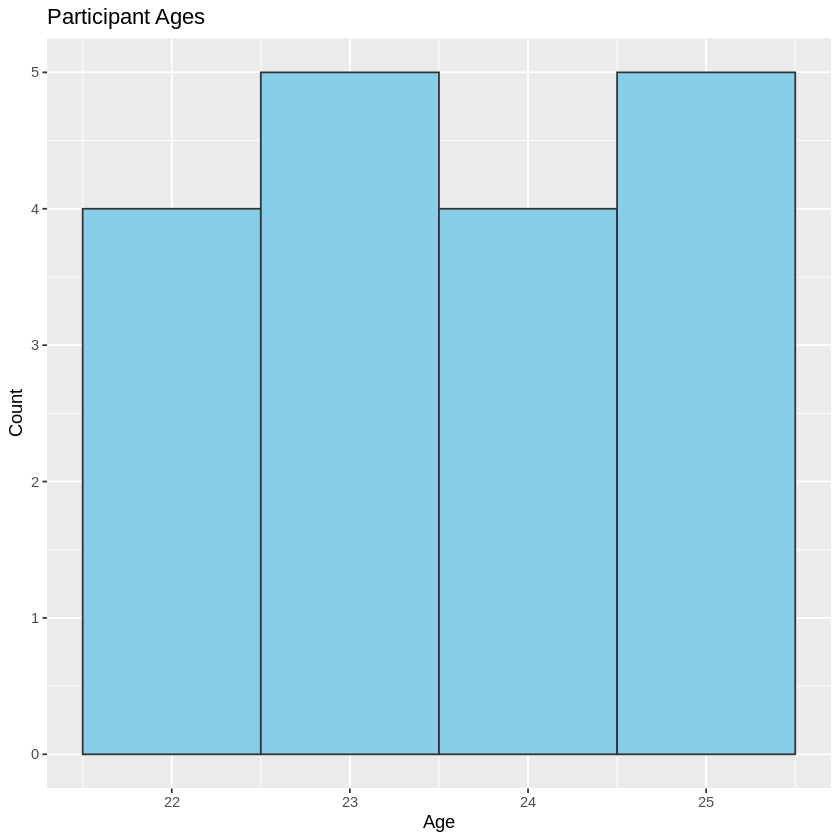

In [6]:
summary_df %>%
  ggplot(aes(age)) +
  geom_histogram(
    binwidth = 1,
    fill     = "skyblue",    # bar fill color
    color    = "grey20"      # bar border color
  ) +
  labs(
    title = "Participant Ages",
    x     = "Age",
    y     = "Count"
  )

In [7]:
trials_df %>%
  group_by(congruence) %>%
  summarise(
    mean_rt = mean(rt, na.rm=TRUE),
    sd_rt   = sd(rt,   na.rm=TRUE),
    n       = n()
  )

congruence,mean_rt,sd_rt,n
<chr>,<dbl>,<dbl>,<int>
congruent,0.5309447,0.2449727,180
incongruent,0.5801235,0.2821427,180


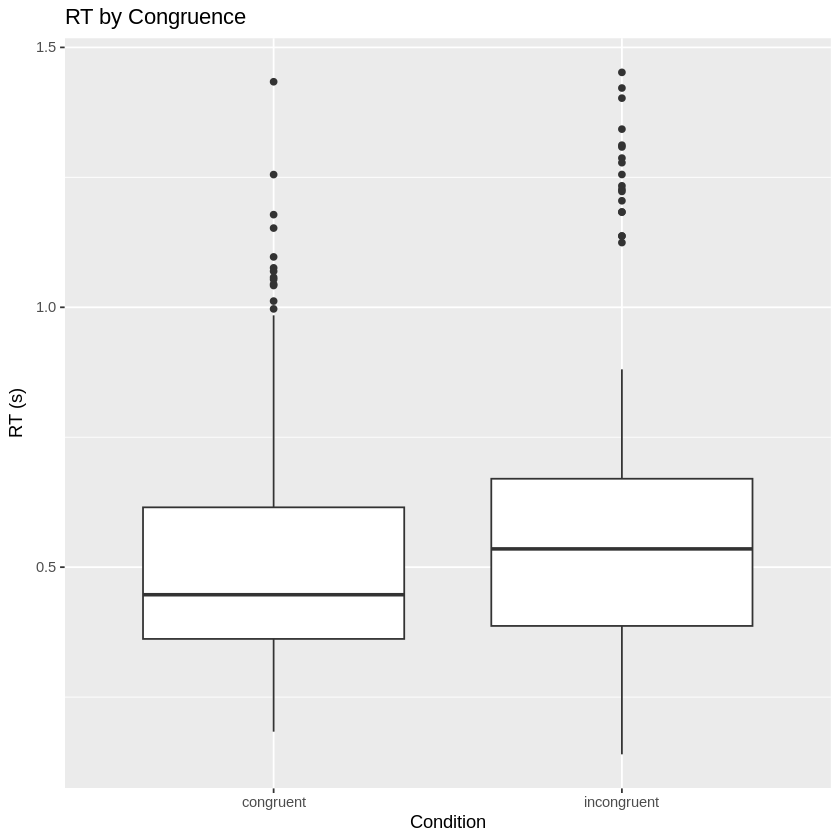

In [9]:
trials_df %>%
  ggplot(aes(congruence, rt)) +
  geom_boxplot(na.rm = TRUE) +   # ggplot to remove NAs
  labs(title="RT by Congruence", x="Condition", y="RT (s)")

In [10]:
trials_df %>%
  group_by(participant_nr) %>%
  summarise(accuracy = mean(correct, na.rm=TRUE)) %>%
  arrange(accuracy)

participant_nr,accuracy
<dbl>,<dbl>
1,0.8421053
3,0.8421053
4,0.8421053
5,0.8421053
6,0.8421053
7,0.8421053
8,0.8421053
9,0.8421053
10,0.8421053


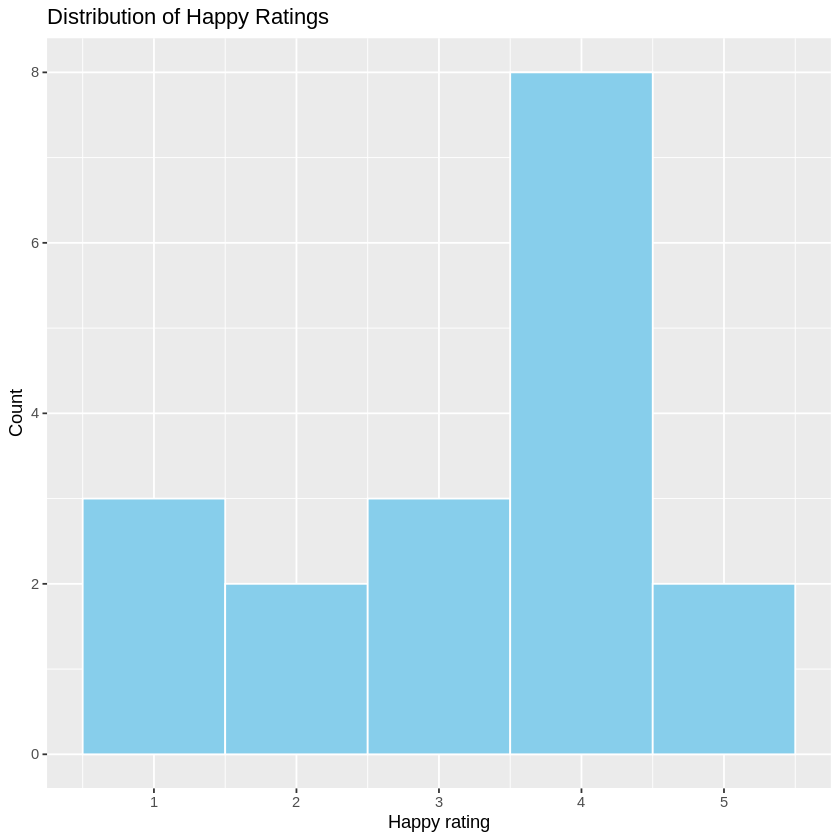

In [11]:
# Happy‐rating histogram
summary_df %>%
  ggplot(aes(happy_rating)) +
  geom_histogram(binwidth = 1, fill="skyblue", color="white") +
  labs(title="Distribution of Happy Ratings", x="Happy rating", y="Count")

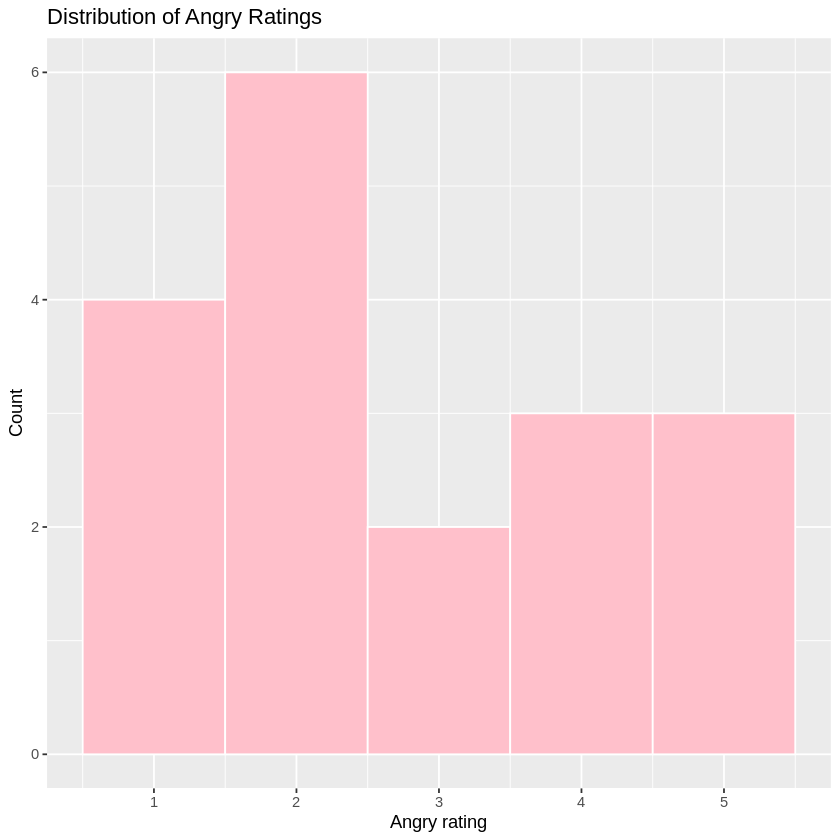

In [13]:
# Angry‐rating histogram
summary_df %>%
  ggplot(aes(angry_rating)) +
  geom_histogram(binwidth = 1, fill="pink", color="white") +
  labs(title="Distribution of Angry Ratings", x="Angry rating", y="Count")

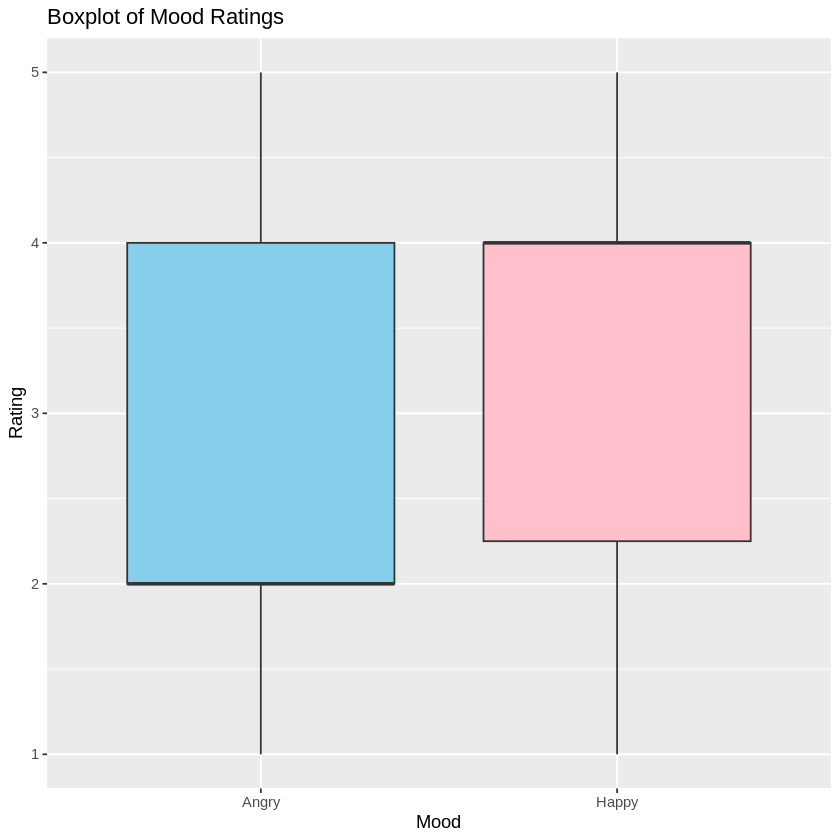

In [16]:
#Boxplots side-by-side Show median, quartiles and outliers for each mood
summary_df %>%
  pivot_longer(c(happy_rating, angry_rating),
               names_to="mood", values_to="rating") %>%
  ggplot(aes(mood, rating, fill=mood)) +
  geom_boxplot() +
  scale_x_discrete(labels=c("happy_rating"="Happy","angry_rating"="Angry")) +
  scale_fill_manual(values=c("skyblue","pink"), guide="none") +
  labs(title="Boxplot of Mood Ratings", x="Mood", y="Rating")

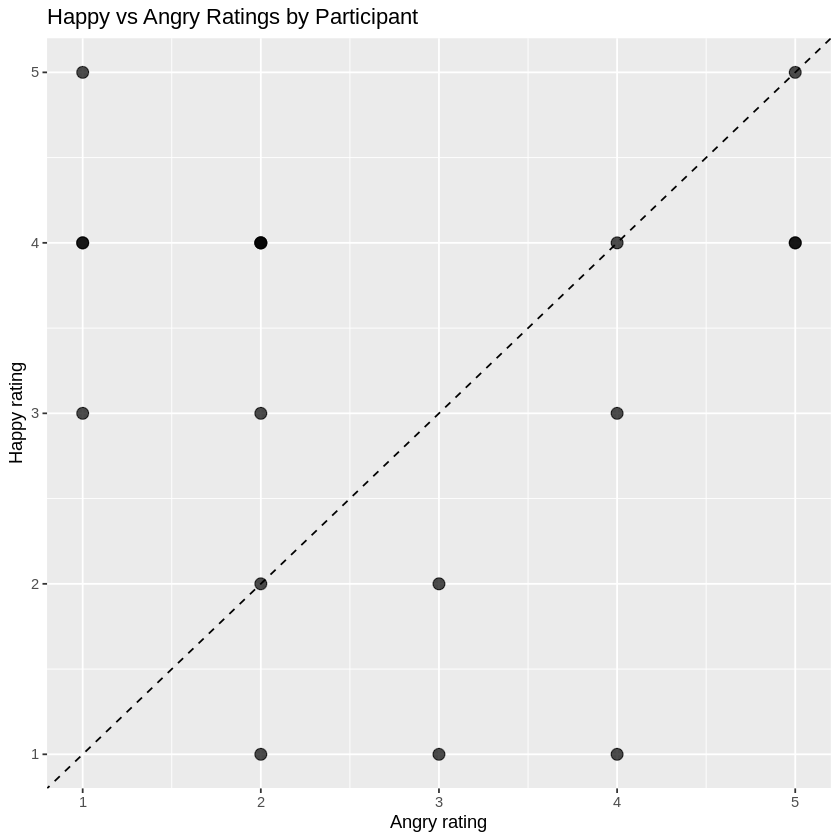

In [17]:
#Scatterplot Happy vs Angry, See how these two ratings relate within individuals:
summary_df %>%
  ggplot(aes(x=angry_rating, y=happy_rating)) +
  geom_point(size=3, alpha=0.7) +
  geom_abline(slope=1, intercept=0, linetype="dashed") +
  labs(title="Happy vs Angry Ratings by Participant",
       x="Angry rating", y="Happy rating")

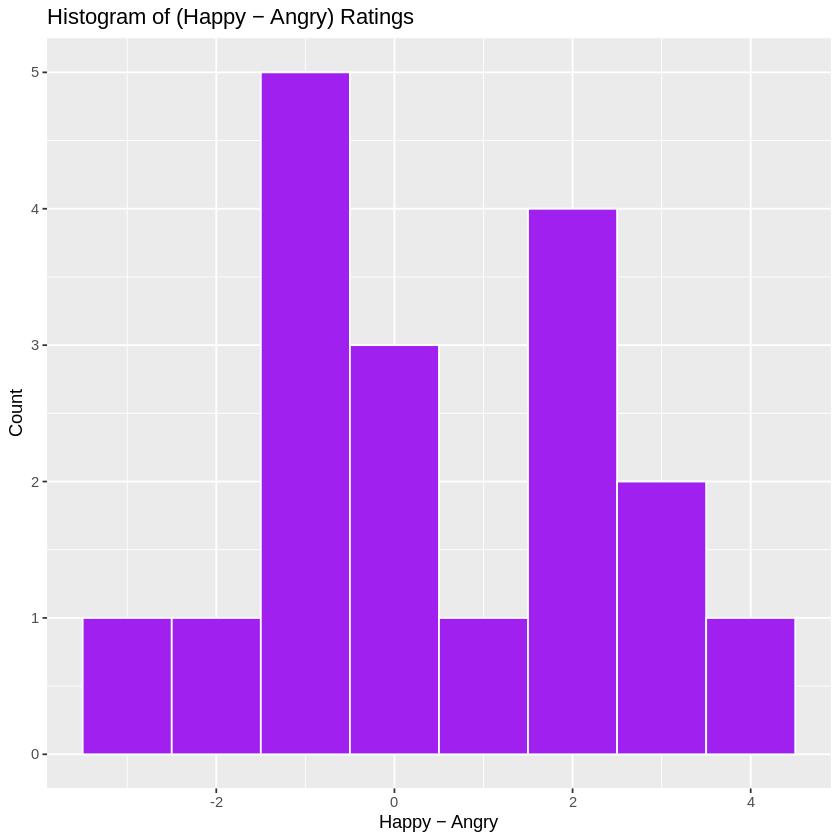

In [20]:
#Difference score histogram
##Compute diff = happy_rating - angry_rating to see net positivity:
summary_df %>%
  mutate(diff = happy_rating - angry_rating) %>%
  ggplot(aes(diff)) +
  geom_histogram(binwidth=1, fill="purple", color="white") +
  labs(title="Histogram of (Happy − Angry) Ratings",
       x="Happy − Angry", y="Count")


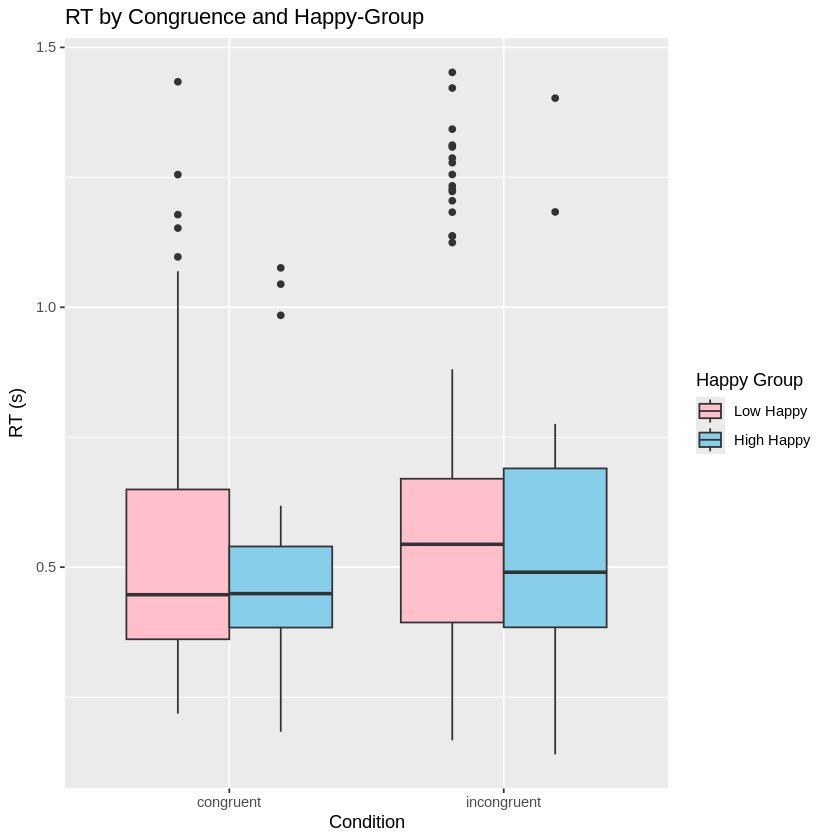

In [27]:
#High- vs Low-mood groups
##Split on the median happy_rating and compare their RTs:
trials_df %>%
  inner_join(summary_df, by="participant_nr") %>%
  mutate(happy_group = happy_rating > median(happy_rating)) %>%
  ggplot(aes(congruence, rt, fill=happy_group)) +
    geom_boxplot(
      position=position_dodge(width=0.75),
      na.rm=TRUE                            # drops NAs
    ) +
    scale_fill_manual(
      values = c("FALSE"="Pink","TRUE"="skyblue"),
      labels = c("Low Happy","High Happy")
    ) +
    labs(
      title = "RT by Congruence and Happy-Group",
      x     = "Condition",
      y     = "RT (s)",
      fill  = "Happy Group"
    )

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


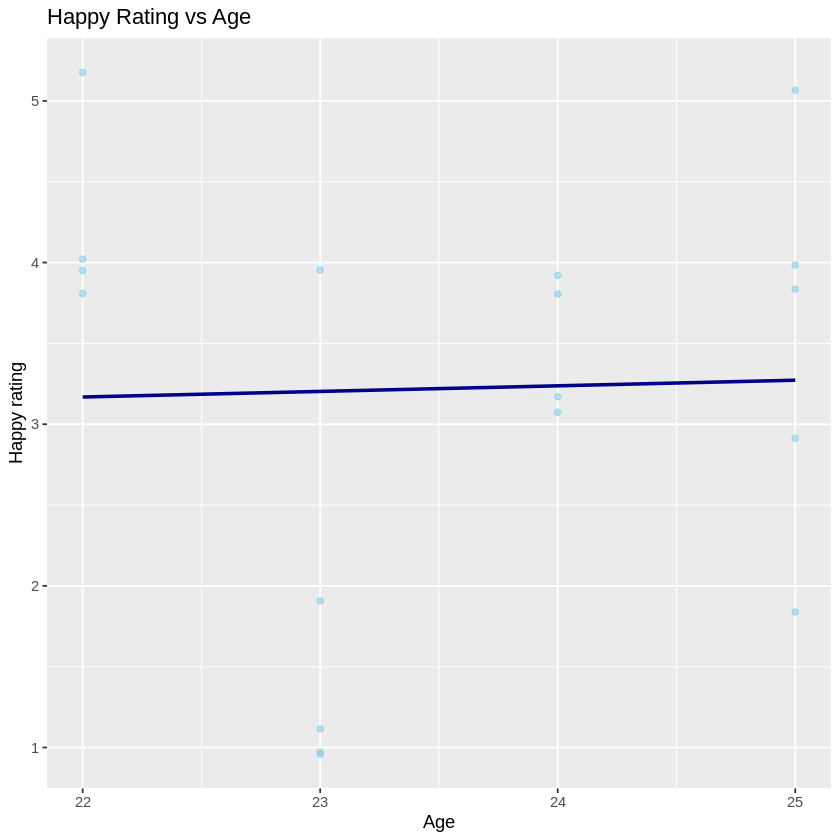

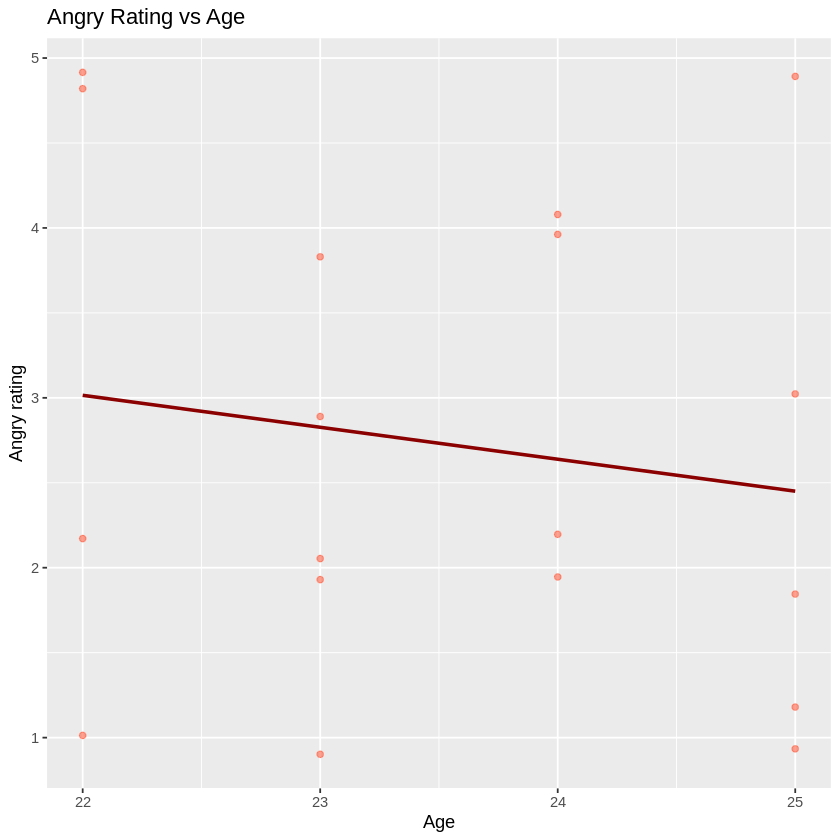

In [21]:
#Ratings by age
## whether younger vs older participants rate differently:
summary_df %>%
  ggplot(aes(x=age, y=happy_rating)) +
  geom_jitter(width=0, height=0.2, alpha=0.6, color="skyblue") +
  geom_smooth(method="lm", se=FALSE, color="darkblue") +
  labs(title="Happy Rating vs Age", x="Age", y="Happy rating")

summary_df %>%
  ggplot(aes(x=age, y=angry_rating)) +
  geom_jitter(width=0, height=0.2, alpha=0.6, color="tomato") +
  geom_smooth(method="lm", se=FALSE, color="darkred") +
  labs(title="Angry Rating vs Age", x="Age", y="Angry rating")



Rows: 18
Columns: 5
$ participant_nr <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ age            <dbl> 22, 24, 24, 25, 23, 25, 25, 22, 23, 23, 23, 25, 24, 23,…
$ happy_rating   <dbl> 4, 4, 4, 5, 1, 4, 2, 5, 4, 1, 1, 3, 3, 2, 4, 4, 3, 4
$ angry_rating   <dbl> 2, 2, 4, 1, 3, 5, 3, 5, 1, 2, 4, 1, 4, 2, 2, 1, 2, 5
$ accuracy       <dbl> 0.8421053, 0.9500000, 0.8421053, 0.8421053, 0.8421053, …

	Pearson's product-moment correlation

data:  combo_df$happy_rating and combo_df$accuracy
t = 0.59997, df = 16, p-value = 0.5569
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3422378  0.5753583
sample estimates:
      cor 
0.1483331 



`geom_smooth()` using formula = 'y ~ x'


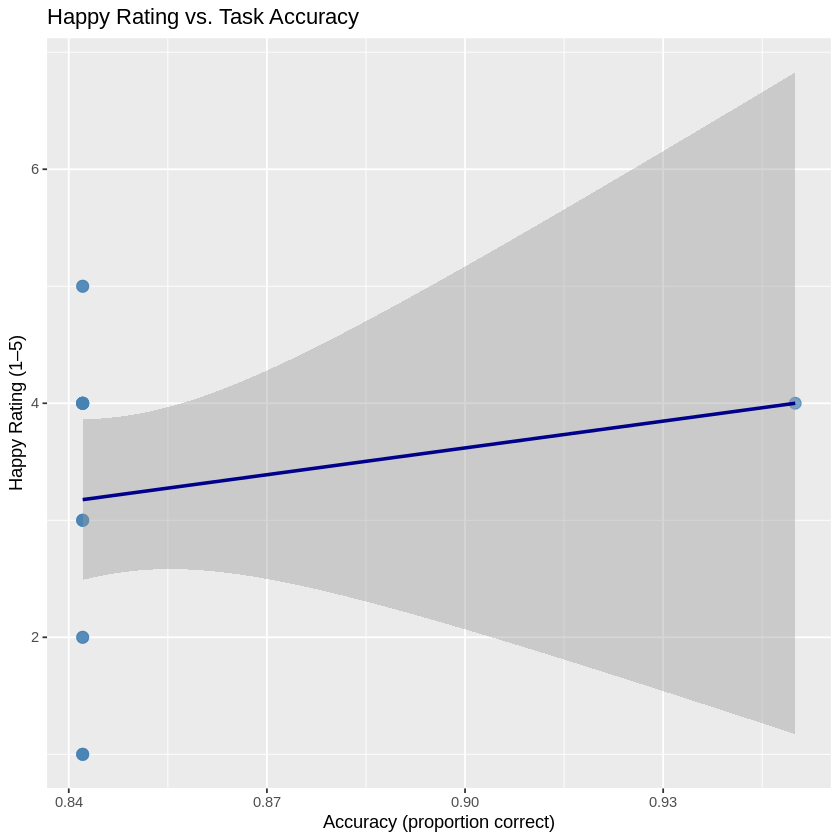

In [22]:
#Happy Rating ↔ Task Accuracy: Correlation Analysis

library(tidyverse)

# Compute accuracy per participant from the trials_df
accuracy_df <- trials_df %>%
  group_by(participant_nr) %>%
  summarise(
    accuracy = mean(correct, na.rm=TRUE)
  )

# Join to mood summary
combo_df <- summary_df %>%
  inner_join(accuracy_df, by="participant_nr")

glimpse(combo_df)
#   participant_nr age happy_rating angry_rating accuracy

# Run  correlation test
cor_test <- cor.test(combo_df$happy_rating, combo_df$accuracy)
print(cor_test)

# Scatter + regression line
combo_df %>%
  ggplot(aes(x=accuracy, y=happy_rating)) +
  geom_point(size=3, alpha=0.7, color="steelblue") +
  geom_smooth(method="lm", se=TRUE, color="darkblue") +
  labs(
    title    = "Happy Rating vs. Task Accuracy",
    x        = "Accuracy (proportion correct)",
    y        = "Happy Rating (1–5)"
  )
